In [25]:
!pip install pandas
!pip install matplotlib

     ---------------------------------------- 0.0/162.6 kB ? eta -:--:--
     -------------------------------------- 162.6/162.6 kB 9.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   -- ------------------------------------- 0.4/7.6 MB 13.2 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/7.6 MB 11.4 MB/s eta 0:00:01
   ------- -------------------------------- 1.4/7.6 MB 11.2 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/7.6 MB 11.5 MB/s eta 0:00:01
   ------------- -------------------------- 2.5/7.6 MB 12.5 MB/s eta 0:00:01
   ---------------- ----------------------- 3.1/7.6 MB 12.3 MB/s eta 0:00:01
   ------------------ --------------------- 3.6/7.6 MB 12.0 MB/s eta 0:00:01
   --------------------- ------------------ 4.1/7.6 MB 11.9 MB/s eta 0:00:01
   ------------------------ --------------- 4.6/7.6 MB 11.9 MB/s eta 0:00:01
   --------------------------- ------------ 5.2/7.6 MB 11.8 MB/s eta 0:00:01
   -----

In [26]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load the dataset
file_path = "Amazon Sales data.csv"
amazon_data = pd.read_csv(file_path)

In [7]:
# Display the first few rows of the dataset
print(amazon_data.head())

                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010        9925   
1        Online              C  8/22/2012  963881480  9/15/2012        2804   
2       Offline              L   5/2/2014  341417157   5/8/2014        1779   
3        Online              C  6/20/2014  514321792   7/5/2014        8102   
4       Offline              L   2/1/2013  115456712   2/6/2013        5062   

   Unit Price  Unit Cost  Total Revenue  Tot

In [8]:
# Check for missing values
missing_values = amazon_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [10]:
# Feature Engineering
# Extracting month and year from the 'Order Date' column
amazon_data['Order Date'] = pd.to_datetime(amazon_data['Order Date'], format='%m/%d/%Y')  # Convert 'Order Date' column to datetime
amazon_data['Month'] = amazon_data['Order Date'].dt.month  # Extract month
amazon_data['Year'] = amazon_data['Order Date'].dt.year    # Extract year

In [11]:
# Display the first few rows of the transformed dataset
print("\nTransformed Dataset:")
print(amazon_data.head())


Transformed Dataset:
                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H 2010-05-28  669165933  6/27/2010        9925   
1        Online              C 2012-08-22  963881480  9/15/2012        2804   
2       Offline              L 2014-05-02  341417157   5/8/2014        1779   
3        Online              C 2014-06-20  514321792   7/5/2014        8102   
4       Offline              L 2013-02-01  115456712   2/6/2013        5062   

   Unit Price  Unit Co

In [17]:
# Exploratory Data Analysis (EDA)

# Total sales by region
sales_by_region = amazon_data.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)


In [18]:

# Total sales by country
sales_by_country = amazon_data.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False)



In [19]:
# Total sales by item type
sales_by_item_type = amazon_data.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)



In [20]:
# Total sales by sales channel
sales_by_channel = amazon_data.groupby('Sales Channel')['Total Revenue'].sum().sort_values(ascending=False)


In [21]:

# Total sales by order priority
sales_by_priority = amazon_data.groupby('Order Priority')['Total Revenue'].sum().sort_values(ascending=False)

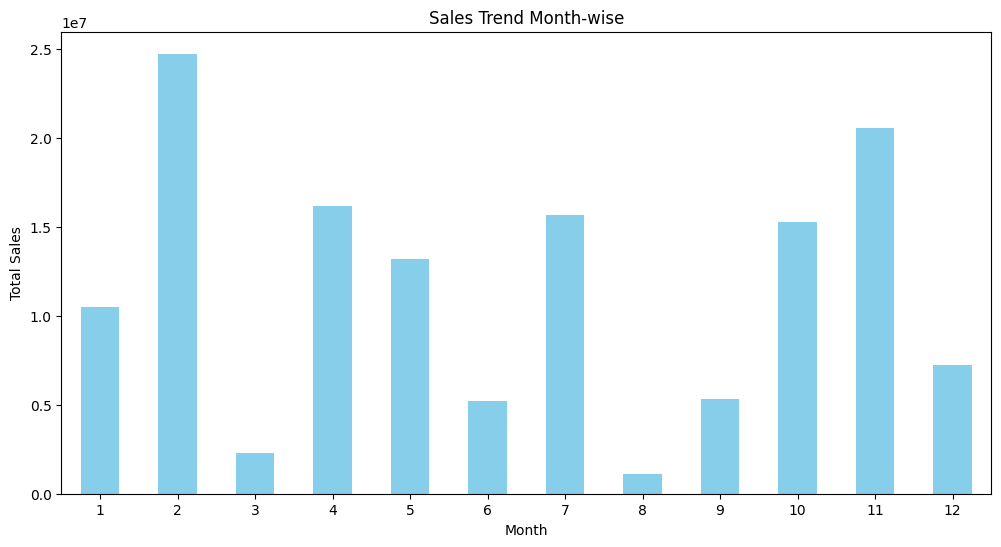

In [37]:
# Sales Trend Month-wise
monthly_sales = amazon_data.groupby('Month')['Total Revenue'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Sales Trend Month-wise')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

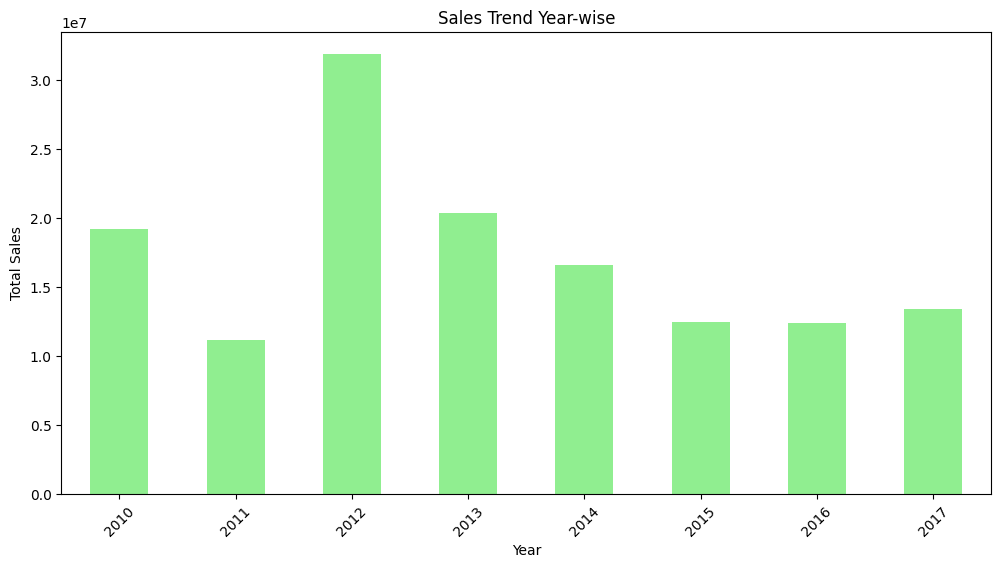

In [38]:
# Sales Trend Year-wise
yearly_sales = amazon_data.groupby('Year')['Total Revenue'].sum()

plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='bar', color='lightgreen')
plt.title('Sales Trend Year-wise')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

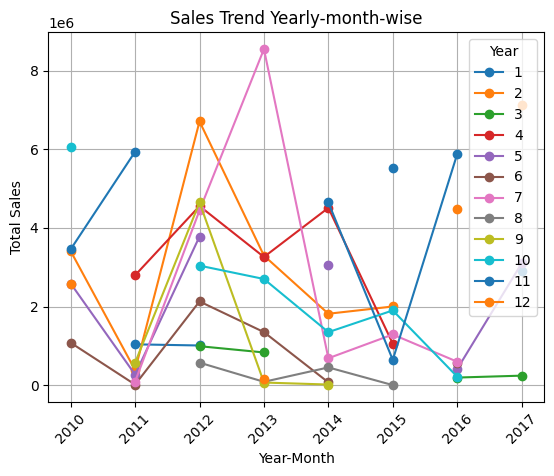

In [39]:
# Sales Trend Yearly-month-wise
yearly_monthly_sales = amazon_data.groupby(['Year', 'Month'])['Total Revenue'].sum()

plt.figure(figsize=(12, 6))
yearly_monthly_sales.unstack().plot(kind='line', marker='o')
plt.title('Sales Trend Yearly-month-wise')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.show()

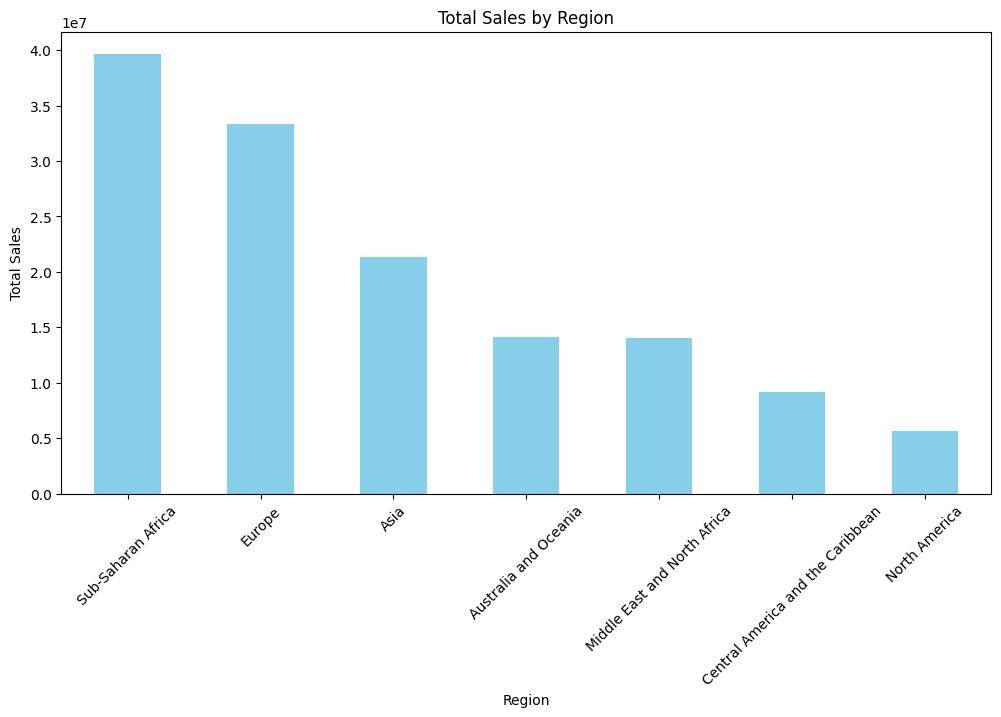

In [27]:
# Visualize sales distribution by region
plt.figure(figsize=(12, 6))
sales_by_region.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

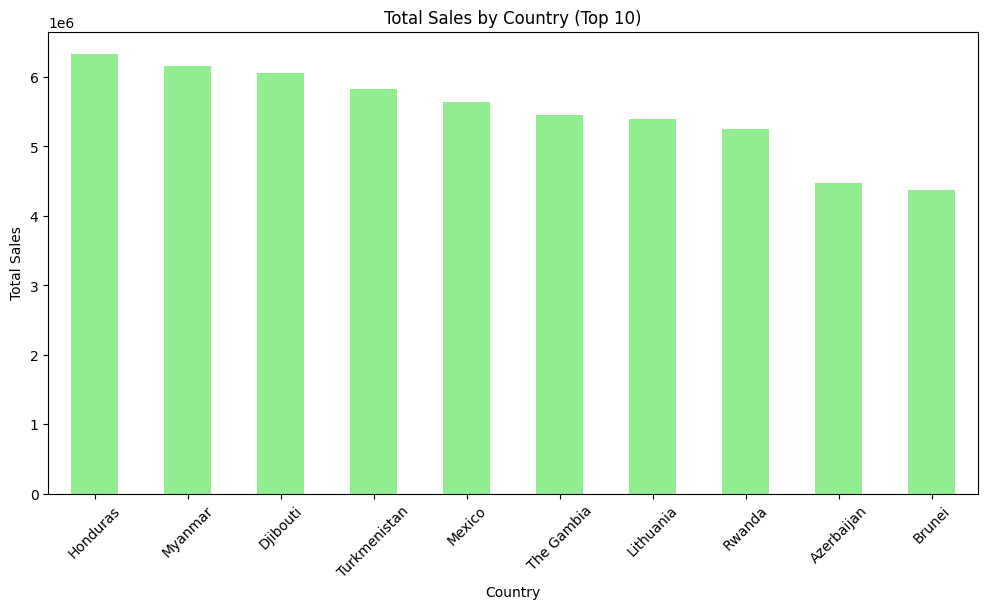

In [28]:
# Visualize sales distribution by country (Top 10 countries)
plt.figure(figsize=(12, 6))
sales_by_country.head(10).plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

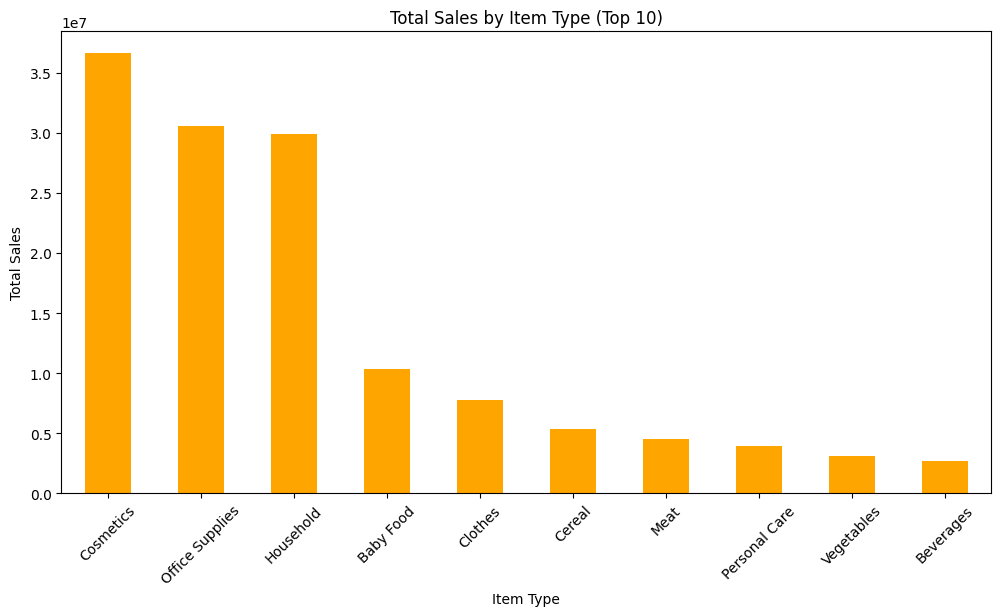

In [29]:
# Visualize sales distribution by item type (Top 10 item types)
plt.figure(figsize=(12, 6))
sales_by_item_type.head(10).plot(kind='bar', color='orange')
plt.title('Total Sales by Item Type (Top 10)')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

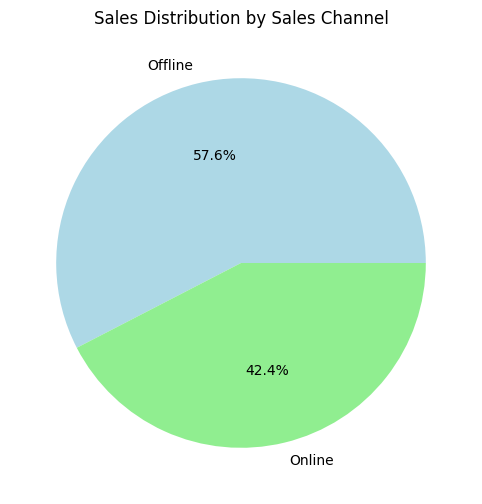

In [30]:
# Visualize sales distribution by sales channel
plt.figure(figsize=(8, 6))
sales_by_channel.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Sales Distribution by Sales Channel')
plt.ylabel('')
plt.show()

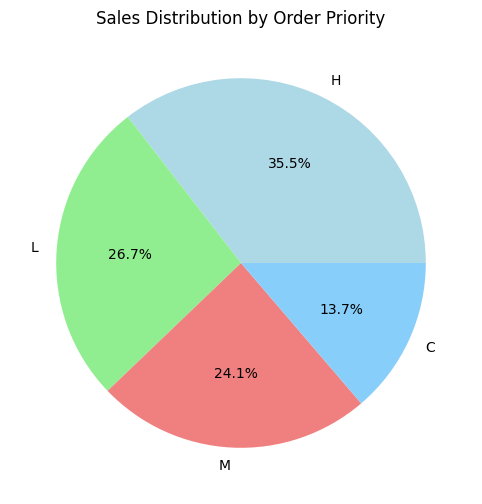

In [31]:
# Visualize sales distribution by order priority
plt.figure(figsize=(8, 6))
sales_by_priority.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Sales Distribution by Order Priority')
plt.ylabel('')
plt.show()

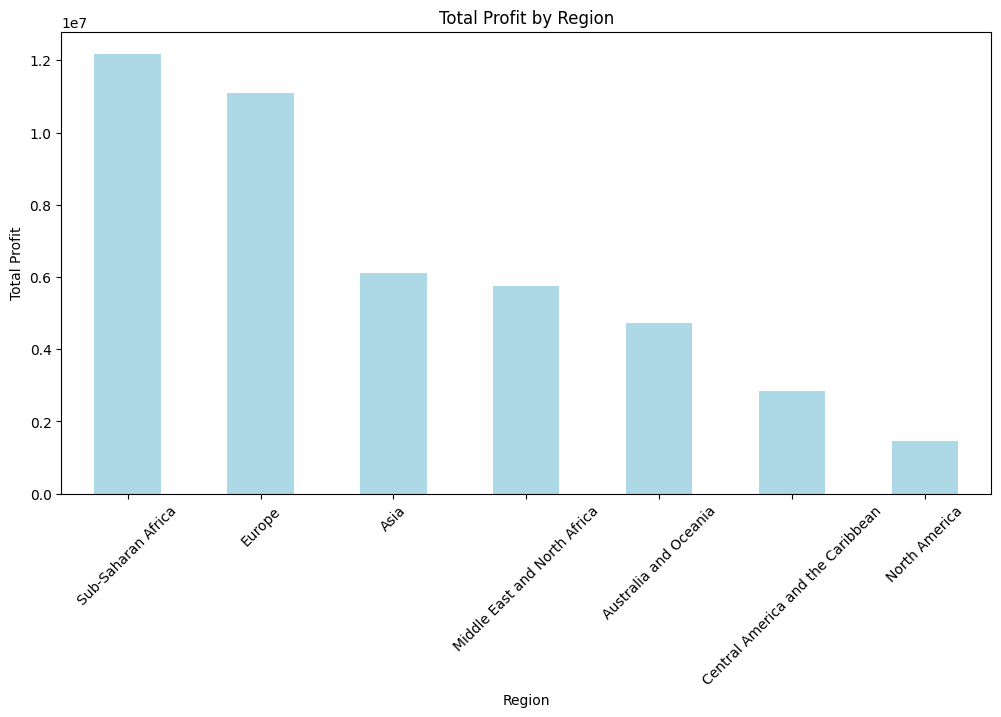

In [32]:
# Profit Analysis: Profit by Region
profit_by_region = amazon_data.groupby('Region')['Total Profit'].sum().sort_values(ascending=False)

# Visualize profit by region
plt.figure(figsize=(12, 6))
profit_by_region.plot(kind='bar', color='lightblue')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


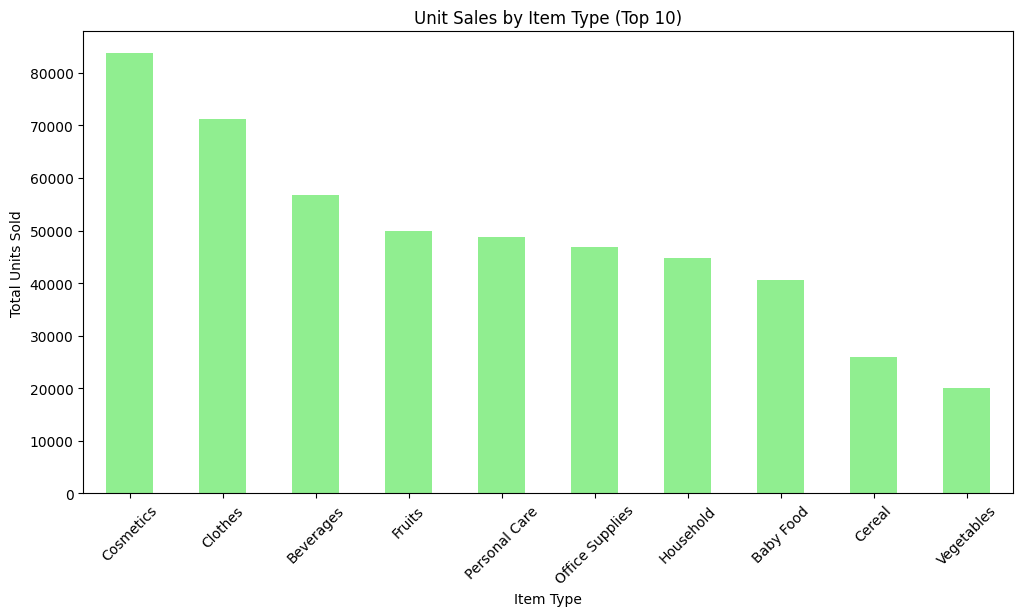

In [33]:
# Unit Sales Analysis: Distribution of unit sales by item type
unit_sales_by_item_type = amazon_data.groupby('Item Type')['Units Sold'].sum().sort_values(ascending=False)

# Visualize unit sales by item type
plt.figure(figsize=(12, 6))
unit_sales_by_item_type.head(10).plot(kind='bar', color='lightgreen')
plt.title('Unit Sales by Item Type (Top 10)')
plt.xlabel('Item Type')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.show()


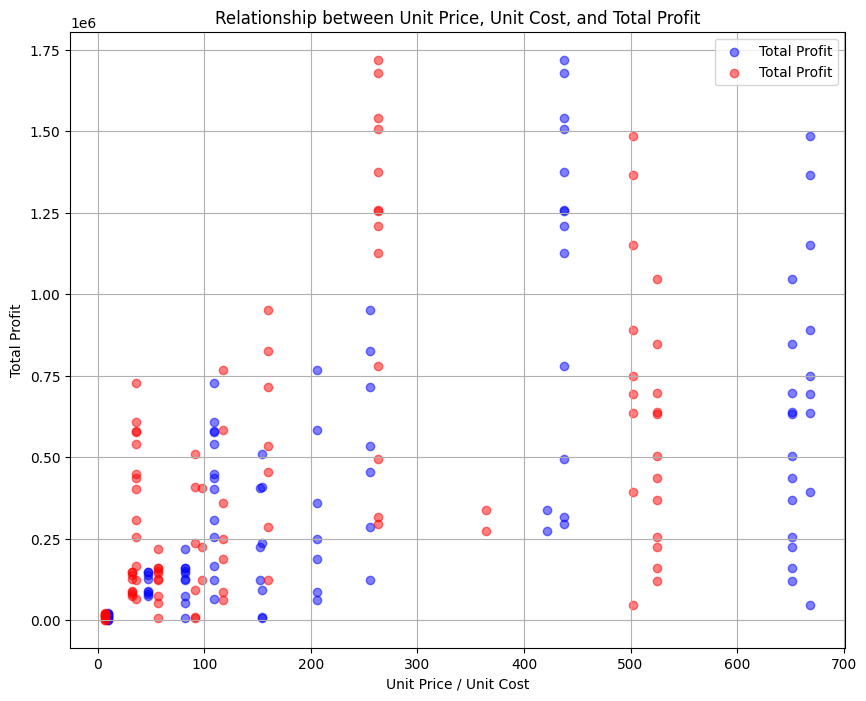

In [34]:
# Pricing Analysis: Relationship between unit price, unit cost, and total profit
plt.figure(figsize=(10, 8))
plt.scatter(amazon_data['Unit Price'], amazon_data['Total Profit'], color='blue', alpha=0.5, label='Total Profit')
plt.scatter(amazon_data['Unit Cost'], amazon_data['Total Profit'], color='red', alpha=0.5, label='Total Profit')
plt.title('Relationship between Unit Price, Unit Cost, and Total Profit')
plt.xlabel('Unit Price / Unit Cost')
plt.ylabel('Total Profit')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

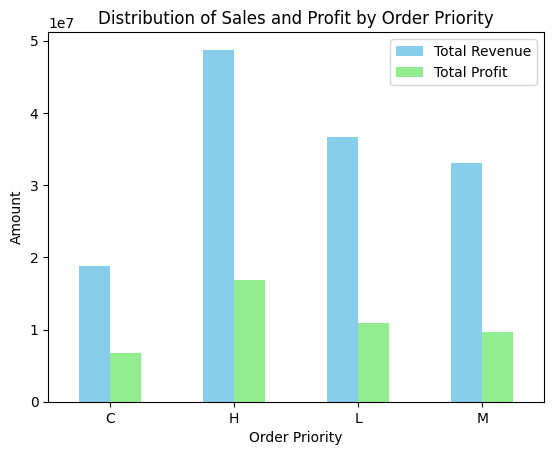

In [35]:
# Order Priority Analysis: Distribution of sales and profit by order priority
sales_profit_by_priority = amazon_data.groupby('Order Priority')[['Total Revenue', 'Total Profit']].sum()

plt.figure(figsize=(10, 6))
sales_profit_by_priority.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Sales and Profit by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend(['Total Revenue', 'Total Profit'])
plt.show()


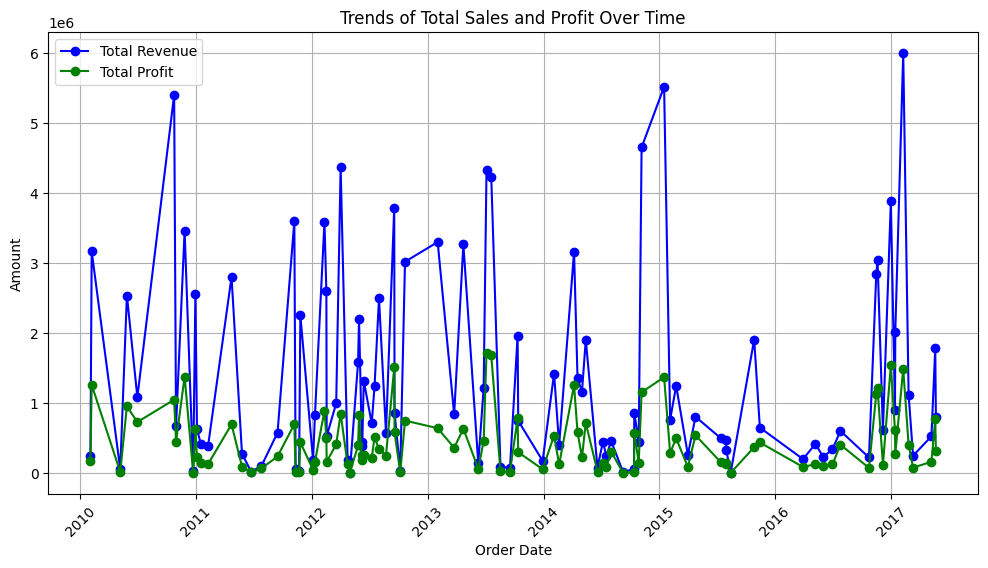

In [36]:
# Time-Series Analysis: Trends of total sales and profit over time
time_series_data = amazon_data.groupby('Order Date')[['Total Revenue', 'Total Profit']].sum()

plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data['Total Revenue'], marker='o', color='blue', label='Total Revenue')
plt.plot(time_series_data.index, time_series_data['Total Profit'], marker='o', color='green', label='Total Profit')
plt.title('Trends of Total Sales and Profit Over Time')
plt.xlabel('Order Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
